# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

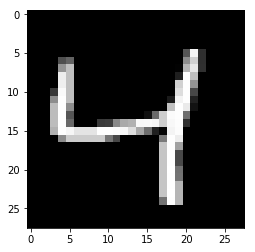

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name="inputs")
targets_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name="targets")

# Output of hidden layer
encoded = tf.layers.dense(inputs=inputs_,
                          units=encoding_dim,
                          activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(inputs=encoded,
                         units=image_size,
                         activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(x=logits,
                        name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                               labels=targets_,
                                               name="loss")
# Mean of the loss
cost = tf.reduce_mean(input_tensor=loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(loss=cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6847
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6753
Epoch: 1/20... Training loss: 0.6653
Epoch: 1/20... Training loss: 0.6610
Epoch: 1/20... Training loss: 0.6515
Epoch: 1/20... Training loss: 0.6385
Epoch: 1/20... Training loss: 0.6254
Epoch: 1/20... Training loss: 0.6128
Epoch: 1/20... Training loss: 0.5975
Epoch: 1/20... Training loss: 0.5821
Epoch: 1/20... Training loss: 0.5635
Epoch: 1/20... Training loss: 0.5493
Epoch: 1/20... Training loss: 0.5291
Epoch: 1/20... Training loss: 0.5140
Epoch: 1/20... Training loss: 0.4913
Epoch: 1/20... Training loss: 0.4695
Epoch: 1/20... Training loss: 0.4515
Epoch: 1/20... Training loss: 0.4344
Epoch: 1/20... Training loss: 0.4206
Epoch: 1/20... Training loss: 0.4157
Epoch: 1/20... Training loss: 0.3965
Epoch: 1/20... Training loss: 0.3804
Epoch: 1/20... Training loss: 0.3694
E

Epoch: 1/20... Training loss: 0.2057
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.2017
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.2043
Epoch: 1/20... Training loss: 0.2040
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.2022
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.2038
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1961
E

Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1733
Epoch: 2/20... Training loss: 0.1653
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1706
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1682
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1689
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1684
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1632
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1593
E

Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1396
E

Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1305
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1326
Epoch: 4/20... Training loss: 0.1316
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1314
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1305
E

Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1196
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1188
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1212
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1186
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1198
Epoch: 5/20... Training loss: 0.1200
Epoch: 5/20... Training loss: 0.1208
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1209
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1213
Epoch: 5/20... Training loss: 0.1147
E

Epoch: 6/20... Training loss: 0.1160
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1143
Epoch: 6/20... Training loss: 0.1123
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1156
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1148
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1165
Epoch: 6/20... Training loss: 0.1123
Epoch: 6/20... Training loss: 0.1133
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1129
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1128
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1141
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1120
E

Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1096
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1090
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1085
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1031
E

Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1041
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0994
E

Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.1021
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0978
E

Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.1021
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0896
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0896
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0995
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.1006
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

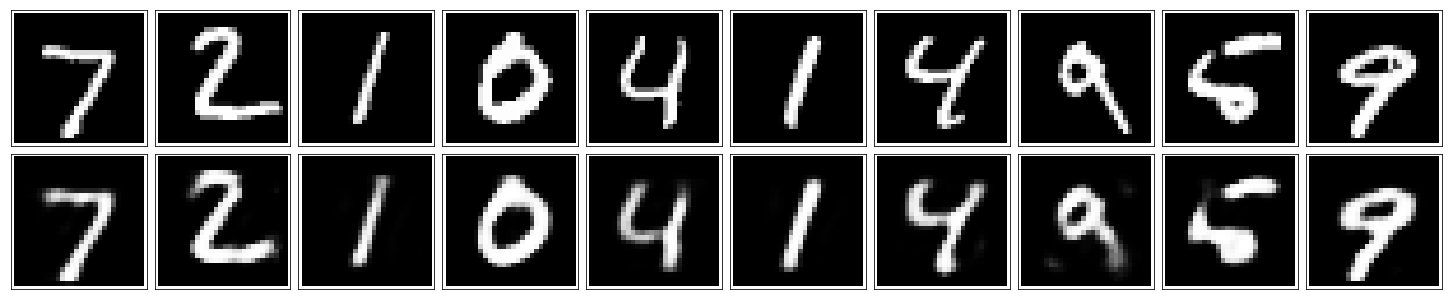

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.